In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
df.shape

(30, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


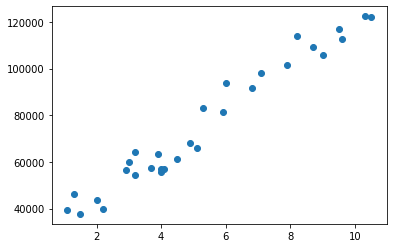

In [9]:
plt.scatter(df.YearsExperience,df.Salary)

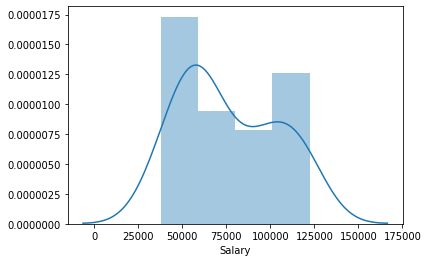

In [18]:
sns.distplot(df['Salary'])

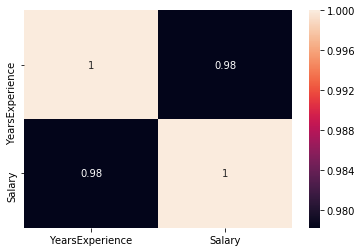

In [21]:
sns.heatmap(df.corr(),annot=True)

In [25]:
x=df.drop('Salary',axis=1)
y=df['Salary']

In [23]:
x

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [27]:
from sklearn.model_selection import train_test_split

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
lm=LinearRegression()

In [64]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
lm.intercept_

27206.42890292858

In [66]:
lm.coef_

array([9303.95933197])

In [67]:
y_pred=lm.predict(x_test)

In [68]:
y_pred_train=lm.predict(x_train)

In [69]:
from sklearn import metrics

In [70]:
metrics.r2_score(y_test,y_pred)

0.9647278344670828

In [71]:
metrics.r2_score(y_train,y_pred_train)

0.9505319424191246

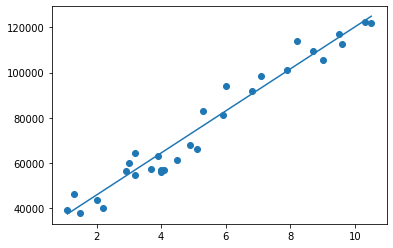

In [74]:
plt.scatter(df.YearsExperience,df.Salary)
plt.plot(df.YearsExperience,9303.95933197*df.YearsExperience + 27206.42890292858)
plt.show()

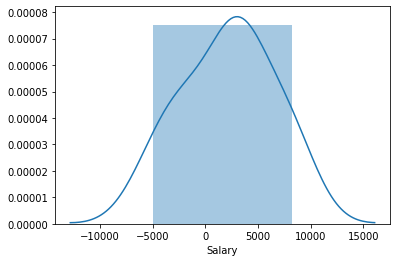

In [75]:
sns.distplot(y_pred-y_test)

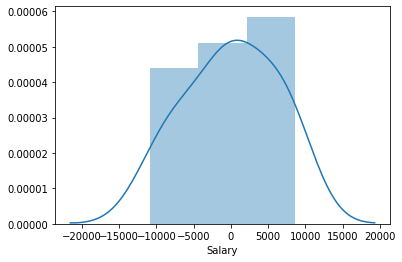

In [76]:
sns.distplot(y_pred_train-y_train)

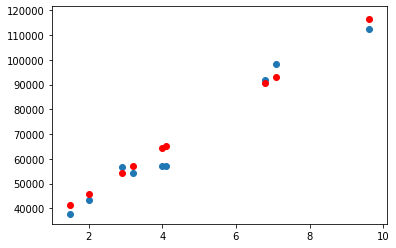

In [78]:
plt.scatter(x_test,y_test)
plt.scatter(x_test,y_pred,color='r')

## Bulding a Linear model

In [79]:
import statsmodels.api as sm

In [82]:
#Fitting process in statsmodel
x_train_sm = sm.add_constant(x_train)
lr=sm.OLS(y_train,x_train_sm).fit()

C:\Users\DELL\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [83]:
lr.params

const              27206.428903
YearsExperience     9303.959332
dtype: float64

In [85]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     365.1
Date:                Fri, 06 Sep 2019   Prob (F-statistic):           7.29e-14
Time:                        13:08:13   Log-Likelihood:                -212.54
No. Observations:                  21   AIC:                             429.1
Df Residuals:                      19   BIC:                             431.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.721e+04   3068.586      8.866      0.000    2.08e+04    3.36e+04
YearsExperience  9303.9593    486.934     19.107      0.000    8284.795    1.03e+04
==============================================================================
Omnibus:                        1.806   Durbin-Watson:                   2.259
Prob(Omnibus):                  0.405   Jarque-Bera (JB):                1.080
Skew:                           0.201   Prob(JB):                        0.583
Kurtosis:                       1.964   Cond. No.                         14.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
x_train_sm

,const,YearsExperience
1,1.0,1.3
19,1.0,6.0
14,1.0,4.5
18,1.0,5.9
6,1.0,3.0
11,1.0,4.0
23,1.0,8.2
24,1.0,8.7
28,1.0,10.3
22,1.0,7.9
